## Bibliothèques utilisées (API)

In [32]:
import java.nio.file.Files;
import java.nio.file.Path;
import java.util.HashMap;
import java.util.Arrays;
import java.util.List;
import java.math.BigDecimal;

### Classes

In [33]:
/* Tout ce qui suit représente la préparation des données pour téléverser les donnéees */
class EconomicYearRecord {
    private String CountryCode;
    private int Year;
    private BigDecimal Gdp, GdpGrowth, InflationRate;

    public EconomicYearRecord(String[] csvLine) {
        this.CountryCode = csvLine[0];
        this.Year = Integer.parseInt(csvLine[1]);
        this.Gdp = new BigDecimal(csvLine[2].replace(",", "."));
        this.GdpGrowth = new BigDecimal(csvLine[3].replace(",", "."));
        this.InflationRate = new BigDecimal(csvLine[4].replace(",", "."));
    }
    public String getCountryCode() {
        return this.CountryCode;
    }
    public int getYear() {
        return this.Year;
    }
    public BigDecimal getGDP() {
        return this.Gdp;
    }
    public BigDecimal getGdpGrowth() {
        return this.GdpGrowth;
    }
    public BigDecimal getInflationRate() {
        return this.InflationRate;
    }
}
public class Country {
    private final String CountryCode, Name;
    private final List<EconomicYearRecord> yearRecords = new ArrayList<EconomicYearRecord>();
    
    public Country(String[] csvLine) {
        this.CountryCode = csvLine[0];
        this.Name = csvLine[1];
    }
    public String getName() {
        return this.Name;
    }
    public String getCountryCode() {
        return this.CountryCode;
    }
    public void addEconomicYearRecord(EconomicYearRecord res) {
        this.yearRecords.add(res);
    }
    public Iterable<EconomicYearRecord> getEconomicYearRecords() {
        return this.yearRecords;
    }
}
   

### Chargement CSV

#### Country

In [34]:
List<String> lines = Files.readAllLines(Path.of("data/pays.csv"));
lines.remove(0); // Suppression des entêtes de colonnes
Map<String, Country> countries = new HashMap<String, Country>(); // On va lier chaque pays à son code

for(var line : lines) {
    var c = new Country((line.split(";")));
    countries.put(c.getCountryCode(), c);
    System.out.printf("%s : %s%n", c.getCountryCode(), c.getName());
}

BRA : Brasil
RUS : Russia
IND : India
CHN : China
ZAF : South Africa


#### EconomicYearRecord

In [35]:
List<String> lines = Files.readAllLines(Path.of("data/data.csv"));
lines.remove(0); // Suppression des entêtes de colonnes

for(var line : lines) {
    var e = new EconomicYearRecord(line.split(";"));
    if(!countries.containsKey(e.getCountryCode())) {
        System.err.printf("Country's not found %s%n", e.getCountryCode());
    }
    else {
        countries.get(e.getCountryCode()).addEconomicYearRecord(e);
        System.out.printf("%s : %d%n", e.getCountryCode(), e.getYear());
    }
}

BRA : 2000
BRA : 2001
BRA : 2002
BRA : 2003
BRA : 2004
BRA : 2005
BRA : 2006
BRA : 2007
BRA : 2008
BRA : 2009
BRA : 2010
BRA : 2011
BRA : 2012
BRA : 2013
BRA : 2014
BRA : 2015
BRA : 2016
BRA : 2017
BRA : 2018
BRA : 2019
BRA : 2020
BRA : 2021
BRA : 2022
BRA : 2023
BRA : 2024
BRA : 2025
BRA : 2026
BRA : 2027
BRA : 2028
BRA : 2029
RUS : 2000
RUS : 2001
RUS : 2002
RUS : 2003
RUS : 2004
RUS : 2005
RUS : 2006
RUS : 2007
RUS : 2008
RUS : 2009
RUS : 2010
RUS : 2011
RUS : 2012
RUS : 2013
RUS : 2014
RUS : 2015
RUS : 2016
RUS : 2017
RUS : 2018
RUS : 2019
RUS : 2020
RUS : 2021
RUS : 2022
RUS : 2023
RUS : 2024
RUS : 2025
RUS : 2026
RUS : 2027
RUS : 2028
RUS : 2029
IND : 2000
IND : 2001
IND : 2002
IND : 2003
IND : 2004
IND : 2005
IND : 2006
IND : 2007
IND : 2008
IND : 2009
IND : 2010
IND : 2011
IND : 2012
IND : 2013
IND : 2014
IND : 2015
IND : 2016
IND : 2017
IND : 2018
IND : 2019
IND : 2020
IND : 2021
IND : 2022
IND : 2023
IND : 2024
IND : 2025
IND : 2026
IND : 2027
IND : 2028
IND : 2029
CHN : 2000

## Graphique

In [36]:
%dependency /add org.knowm.xchart:xchart:3.8.8
%dependency /resolve

Adding dependency org.knowm.xchart:xchart:3.8.8
Solving dependencies
Resolved artifacts count: 16
Add to classpath: /home/vscode/.local/share/jupyter/kernels/rapaio-jupyter-kernel/mima_cache/org/knowm/xchart/xchart/3.8.8/xchart-3.8.8.jar
Add to classpath: /home/vscode/.local/share/jupyter/kernels/rapaio-jupyter-kernel/mima_cache/de/erichseifert/vectorgraphics2d/VectorGraphics2D/0.13/VectorGraphics2D-0.13.jar
Add to classpath: /home/vscode/.local/share/jupyter/kernels/rapaio-jupyter-kernel/mima_cache/de/rototor/pdfbox/graphics2d/3.0.1/graphics2d-3.0.1.jar
Add to classpath: /home/vscode/.local/share/jupyter/kernels/rapaio-jupyter-kernel/mima_cache/org/apache/pdfbox/pdfbox/3.0.1/pdfbox-3.0.1.jar
Add to classpath: /home/vscode/.local/share/jupyter/kernels/rapaio-jupyter-kernel/mima_cache/org/apache/pdfbox/pdfbox-io/3.0.1/pdfbox-io-3.0.1.jar
Add to classpath: /home/vscode/.local/share/jupyter/kernels/rapaio-jupyter-kernel/mima_cache/org/apache/pdfbox/fontbox/3.0.1/fontbox-3.0.1.jar
Add to c

In [37]:
import org.knowm.xchart.QuickChart;
import org.knowm.xchart.BitmapEncoder;

In [38]:
import java.util.stream.Stream;
import java.util.stream.StreamSupport;

/**
 * Convertit un Iterable en Stream
 */
<T> Stream<T> toStream(Iterable<T> from)
{
    return StreamSupport.stream(from.spliterator(), false);
}

/**
 * Convertit un tableau de Double en sa version primitive (double[])
 */
double[] toPrimitives(Double[] doubles) {
    double[] primitives = new double[doubles.length];
    
    for (int i = 0; i < doubles.length; i++) {
        primitives[i] = doubles[i];
    }
    return primitives;
}

/**
 * Convertit un tableau 2D de Double en sa version primitive (double[])
 */
double[][] toPrimitives(Double[][] doubles) {
    double[][] primitives = new double[doubles.length][];
    
    for (int i = 0; i < doubles.length; i++) {
        primitives[i] = new double[doubles[i].length];
        for (int j = 0; j < doubles[i].length; j++) {
            primitives[i][j] = doubles[i][j];
        }
    }
    return primitives;
}

In [39]:
var streamYear = countries.entrySet().stream()
    // Extrait les résultats des pays
    .flatMap(pair -> toStream(pair.getValue().getEconomicYearRecords()))
    // Prend l'année
    .map(r -> (double)r.getYear())
    .sorted()
    .distinct();
var streamGdpPerCountries = countries.entrySet().stream()
    .map(pair -> toStream(pair.getValue().getEconomicYearRecords())
        .map(r -> r.getGDP().doubleValue())
        .toArray(Double[]::new)
    );
var x = toPrimitives(streamYear.toArray(Double[]::new));
var y = toPrimitives(streamGdpPerCountries.toArray(Double[][]::new));

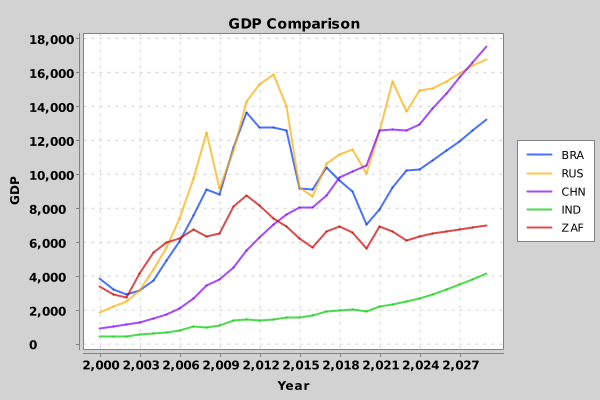

In [40]:
var chart = QuickChart.getChart(
    "GDP Comparison", "Year", "GDP",
    countries.keySet().toArray(String[]::new), 
    x,
    y
);
BitmapEncoder.getBufferedImage(chart);

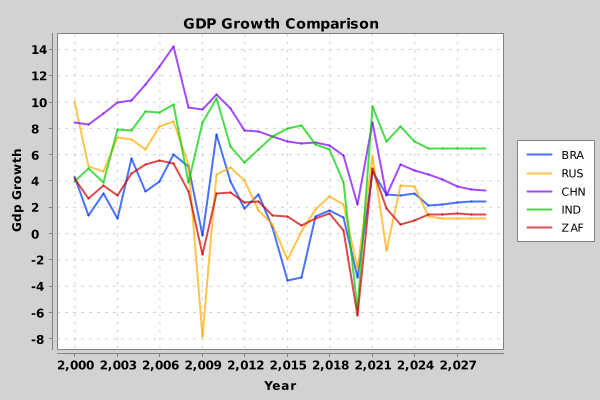

In [41]:
var streamYear = countries.entrySet().stream()
    // Extrait les résultats des pays
    .flatMap(pair -> toStream(pair.getValue().getEconomicYearRecords()))
    // Prend l'année
    .map(r -> (double)r.getYear())
    .sorted()
    .distinct();
var streamGdpPerCountries = countries.entrySet().stream()
    .map(pair -> toStream(pair.getValue().getEconomicYearRecords())
        .map(r -> r.getGdpGrowth().doubleValue())
        .toArray(Double[]::new)
    );
var x = toPrimitives(streamYear.toArray(Double[]::new));
var y2 = toPrimitives(streamGdpPerCountries.toArray(Double[][]::new));

var chart = QuickChart.getChart(
    "GDP Growth Comparison", "Year", "Gdp Growth",
    countries.keySet().toArray(String[]::new), 
    x,
    y2
);
BitmapEncoder.getBufferedImage(chart);

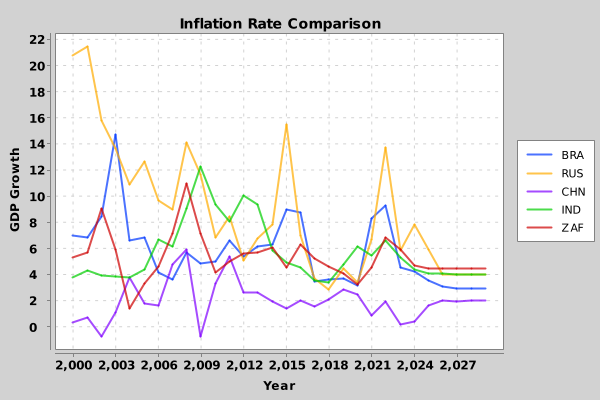

In [42]:
var streamYear = countries.entrySet().stream()
    // Extrait les résultats des pays
    .flatMap(pair -> toStream(pair.getValue().getEconomicYearRecords()))
    // Prend l'année
    .map(r -> (double)r.getYear())
    .sorted()
    .distinct();
var streamGdpPerCountries = countries.entrySet().stream()
    .map(pair -> toStream(pair.getValue().getEconomicYearRecords())
        .map(r -> r.getInflationRate().doubleValue())
        .toArray(Double[]::new)
    );
var x = toPrimitives(streamYear.toArray(Double[]::new));
var y3 = toPrimitives(streamGdpPerCountries.toArray(Double[][]::new));

var chart = QuickChart.getChart(
    "Inflation Rate Comparison", "Year", "GDP Growth",
    countries.keySet().toArray(String[]::new), 
    x,
    y3
);
BitmapEncoder.getBufferedImage(chart);